In [1]:
# import necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
# load dataset
dss = pd.read_csv(r'C:\Users\OJO Timilehin\Desktop\police.csv/ds_salaries.csv') 
dss.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
# drop the Unnamed: 0 columns
dss.drop('Unnamed: 0', axis = 'columns', inplace = True) 

In [4]:
dss.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
# number of unique values 
for col in dss.columns: 
    print (col + ':', dss[col].nunique())

work_year: 3
experience_level: 4
employment_type: 4
job_title: 50
salary: 272
salary_currency: 17
salary_in_usd: 369
employee_residence: 57
remote_ratio: 3
company_location: 50
company_size: 3


In [6]:
dss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [7]:
dss['work_year'] = dss.work_year.astype('category')

In [8]:
dss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           607 non-null    category
 1   experience_level    607 non-null    object  
 2   employment_type     607 non-null    object  
 3   job_title           607 non-null    object  
 4   salary              607 non-null    int64   
 5   salary_currency     607 non-null    object  
 6   salary_in_usd       607 non-null    int64   
 7   employee_residence  607 non-null    object  
 8   remote_ratio        607 non-null    int64   
 9   company_location    607 non-null    object  
 10  company_size        607 non-null    object  
dtypes: category(1), int64(3), object(7)
memory usage: 48.3+ KB


## Work Year 




### Is there an increase in average salary as the year goes by?

In [9]:
# work_year value counts 
dss.work_year.value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

In [10]:
# data scientist average salary per year
year_salary_avg = round(dss.groupby('work_year')['salary_in_usd'].mean())
year_salary_avg

work_year
2020     95813.0
2021     99854.0
2022    124522.0
Name: salary_in_usd, dtype: float64

<AxesSubplot:xlabel='work_year'>

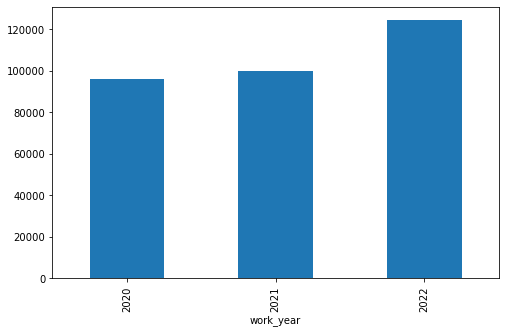

In [11]:
plt.figure(figsize = (8, 5))
year_salary_avg.plot(kind = 'bar')

### Maximum Salary per year

In [12]:
# maximum DS salaries in a year
dss.loc[dss.groupby('work_year')['salary_in_usd'].idxmax()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
33,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
252,2021,EX,FT,Principal Data Engineer,600000,USD,600000,US,100,US,L
523,2022,SE,FT,Data Analytics Lead,405000,USD,405000,US,100,US,L


##### The highest salary was in 2021

## Experience Level

In [13]:
# experience level unique value counts 
dss.experience_level.value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

##### There are quite a few Intermediate level DS and few Expert

## Average salary by experience

In [14]:
explvl_salary_avg = round(dss.groupby('experience_level')['salary_in_usd'].mean()) 
explvl_salary_avg

experience_level
EN     61643.0
EX    199392.0
MI     87996.0
SE    138617.0
Name: salary_in_usd, dtype: float64

<AxesSubplot:title={'center':'Data Scientist Average Salary per Experience'}, xlabel='experience_level', ylabel='Average Salary in USD'>

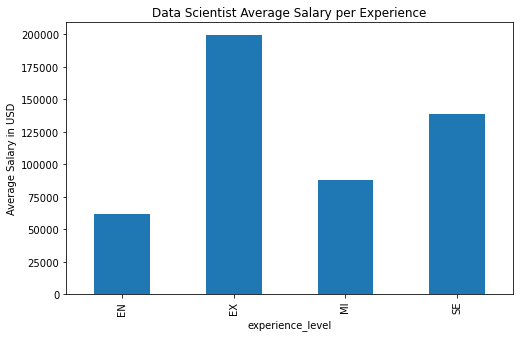

In [15]:
plt.figure(figsize = (8, 5))
explvl_salary_avg.plot(kind = 'bar', ylabel = "Average Salary in USD", title = 'Data Scientist Average Salary per Experience')

##### The expert have the highest average salary while the entry level data scientist have the lowest

### Experience level Data Scientist distribution across different company sizes

In [16]:
pd.crosstab(dss.experience_level, dss.company_size)

company_size,L,M,S
experience_level,,,
EN,29,30,29
EX,11,12,3
MI,86,98,29
SE,72,186,22


<AxesSubplot:xlabel='company_size', ylabel='experience_level'>

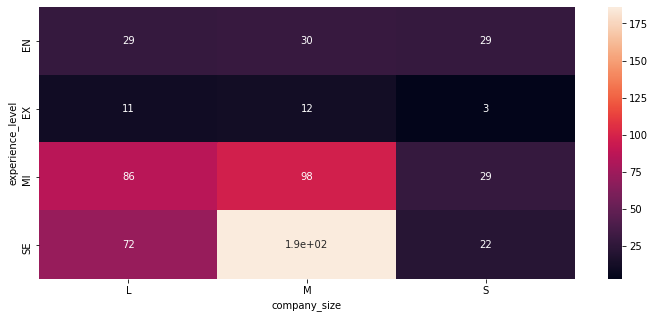

In [17]:
plt.figure(figsize = (12, 5))
sns.heatmap(pd.crosstab(dss.experience_level, dss.company_size), annot = True)

##### Medium and Large companies hire more of Intermediate and Junior Data scientist while Small companies hire more of Junior and Entry level Data Scientist.

### Employment Type

In [18]:
# Employment type unique value counts 
dss.employment_type.value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

##### More than 90% of  the data scientist role are Full time based.

### Salary range for each Employment type

In [19]:
# salary range for each employment type
salary_range = dss.groupby('employment_type')['salary_in_usd'].agg([np.max, np.min]) 

salary_range.reset_index(inplace = True) 

salary_range

,employment_type,amax,amin
0,CT,416000,31875
1,FL,100000,12000
2,FT,600000,2859
3,PT,100000,5409


In [20]:
# renaming the columns name
salary_range.rename(columns = {'amax':'Maximum Salary', 'amin':'Minimum Salary'}, inplace = True) 
salary_range

,employment_type,Maximum Salary,Minimum Salary
0,CT,416000,31875
1,FL,100000,12000
2,FT,600000,2859
3,PT,100000,5409


In [21]:
dss.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [22]:
pd.crosstab(dss.experience_level, dss.employment_type)

employment_type,CT,FL,FT,PT
experience_level,,,,
EN,2,0,79,7
EX,1,0,25,0
MI,1,3,206,3
SE,1,1,278,0


## Remote ratio

In [23]:
dss.remote_ratio.unique()

array([  0,  50, 100], dtype=int64)

In [24]:
# change remote ratio cloumn to category 
dss['remote_ratio'] = dss.remote_ratio.astype('category')

In [25]:
dss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           607 non-null    category
 1   experience_level    607 non-null    object  
 2   employment_type     607 non-null    object  
 3   job_title           607 non-null    object  
 4   salary              607 non-null    int64   
 5   salary_currency     607 non-null    object  
 6   salary_in_usd       607 non-null    int64   
 7   employee_residence  607 non-null    object  
 8   remote_ratio        607 non-null    category
 9   company_location    607 non-null    object  
 10  company_size        607 non-null    object  
dtypes: category(2), int64(2), object(7)
memory usage: 44.2+ KB


In [26]:
dss.remote_ratio.value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

In [27]:
# mappings
mapping=({0:'No remote', 50:'Hybrid', 100:'Fully remote'})

In [28]:
# mapping the remote_ratio columns 
dss['remote_ratio'] = dss.remote_ratio.map(mapping)

In [29]:
dss.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,No remote,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,No remote,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,Hybrid,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,No remote,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,Hybrid,US,L


In [30]:
dss.remote_ratio.value_counts(normalize = True)

Fully remote    0.627677
No remote       0.209226
Hybrid          0.163097
Name: remote_ratio, dtype: float64

##### About 63% of Data science role are Fully remote. 

In [31]:
pd.crosstab(dss.work_year, dss.remote_ratio)

remote_ratio,No remote,Hybrid,Fully remote
work_year,,,
2020,15,21,36
2021,34,66,117
2022,78,12,228


##### Fully Remote data science roles have increased significantly after the 2020 covid-19 Pandemic

## What is the average salary for each remote ratio

In [32]:
# average salary for each remote ratio 
remote_avg_salary =round(dss.groupby('remote_ratio')['salary_in_usd'].mean())
remote_avg_salary

remote_ratio
No remote       106355.0
Hybrid           80823.0
Fully remote    122457.0
Name: salary_in_usd, dtype: float64

<AxesSubplot:xlabel='remote_ratio'>

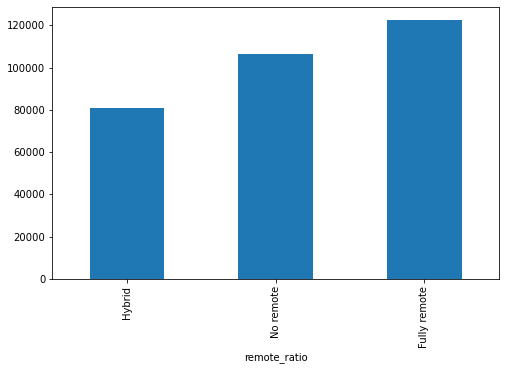

In [33]:
plt.figure(figsize = (8, 5))
remote_avg_salary.sort_values().plot(kind = 'bar')

##### Hybrid data science roles have the least average pay while a Fully Remote role have the highest average pay.

## Company Size 




### Does company size detemines if the role will br fully remote or not

In [34]:
# remote_ratio vs company_size
remote_com_size = pd.crosstab(dss.remote_ratio, dss.company_size) 
remote_com_size.reset_index(inplace = True)

In [35]:
# renaming columns
remote_com_size.rename(columns = {'L':'Large', 'M':'Medium', 'S':'Small'}, inplace = True) 

In [36]:
# removing index name
remote_com_size.rename_axis(None, axis =1, inplace = True)

In [37]:
remote_com_size

,remote_ratio,Large,Medium,Small
0,No remote,32,79,16
1,Hybrid,60,21,18
2,Fully remote,106,226,49


##### Majority of data science roles across different company sizes are Fully remote, though there are Hybrid and No remote roles also

## What is the average salary by company sizes

In [38]:
# average salary by company size
comp_avg_sal = dss.groupby('company_size')['salary_in_usd'].mean() 
comp_avg_sal

company_size
L    119242.994949
M    116905.466258
S     77632.674699
Name: salary_in_usd, dtype: float64

<AxesSubplot:title={'center':'Average Data Science salary by Company Size'}, xlabel='company_size', ylabel='AVerag Salary ($)'>

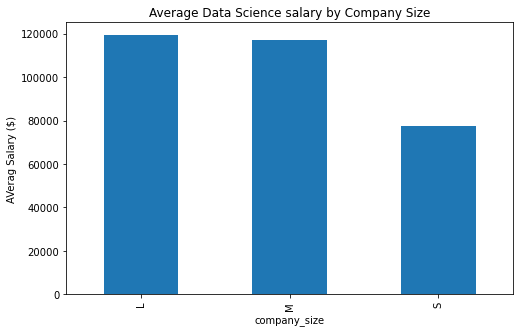

In [39]:
#bar chart
plt.figure(figsize = (8, 5))
comp_avg_sal.plot(kind = 'bar', title = 'Average Data Science salary by Company Size', 
                  ylabel ='AVerag Salary ($)')

##### Large companies pay a slightly higher average salary than Medium sized company. Small sized companies pay the least average salary.

## Salary in USD



### Top Earners

In [40]:
# Top paid data scientist and roles 
Top_earners = dss.sort_values('salary_in_usd', ascending = False) 
Top_earners.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
252,2021,EX,FT,Principal Data Engineer,600000,USD,600000,US,Fully remote,US,L
97,2021,MI,FT,Financial Data Analyst,450000,USD,450000,US,Fully remote,US,L
33,2020,MI,FT,Research Scientist,450000,USD,450000,US,No remote,US,M
157,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,Hybrid,US,L
225,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,Fully remote,US,S
63,2020,SE,FT,Data Scientist,412000,USD,412000,US,Fully remote,US,L
523,2022,SE,FT,Data Analytics Lead,405000,USD,405000,US,Fully remote,US,L
519,2022,SE,FT,Applied Data Scientist,380000,USD,380000,US,Fully remote,US,L
25,2020,EX,FT,Director of Data Science,325000,USD,325000,US,Fully remote,US,L
482,2022,EX,FT,Data Engineer,324000,USD,324000,US,Fully remote,US,M


##### * The top 10 earners are resident in the United states. 
##### * The company they worked for are also resident in the united states 
##### * Nine out of Ten of them have a Full time  employment type with the odd one being a contract job

## Job title

In [41]:
#job titles value counts
dss.job_title.value_counts().head(10)

Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Machine Learning Scientist      8
Big Data Engineer               8
Data Analytics Manager          7
Name: job_title, dtype: int64

##### The top four job titles in the data ecosystem are Data Scientist , Data Engineer, Data Analyst, Machine Learning Engineer      

## Company location

In [42]:
# company location value counts
dss.company_location.value_counts(normalize = True).head(10)

US    0.584843
GB    0.077430
CA    0.049423
DE    0.046129
IN    0.039539
FR    0.024712
ES    0.023064
GR    0.018122
JP    0.009885
NL    0.006590
Name: company_location, dtype: float64

##### About 60% of company hiring data scientist are located in the United states, with Great Britain and Canada coming behind

## Average salary by company location

In [43]:
# average salary by company location
cmploctn_avg_sal = round(dss.groupby('company_location')['salary_in_usd'].mean()).sort_values(ascending = False).head(10) 
cmploctn_avg_sal

company_location
RU    157500.0
US    144055.0
NZ    125000.0
IL    119059.0
JP    114127.0
AU    108043.0
AE    100000.0
DZ    100000.0
IQ    100000.0
CA     99824.0
Name: salary_in_usd, dtype: float64

<AxesSubplot:xlabel='company_location'>

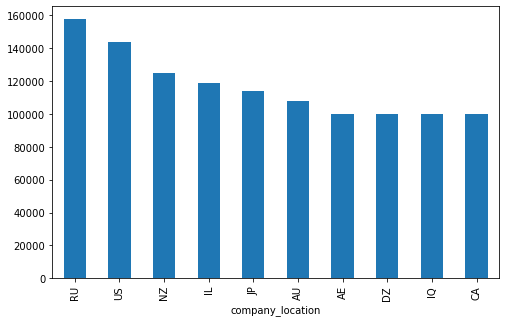

In [44]:
# Top 10 countries with the highest DS average payers
plt.figure(figsize = (8, 5))
cmploctn_avg_sal.plot(kind = 'bar')

##### United states, New zealand companies are one of the top Data scientist payers by average

## Employee Location 

In [45]:
# top resident countries of data scientist
dss.employee_residence.value_counts(normalize = True).head(10)

US    0.546952
GB    0.072488
IN    0.049423
CA    0.047776
DE    0.041186
FR    0.029654
ES    0.024712
GR    0.021417
JP    0.011532
BR    0.009885
Name: employee_residence, dtype: float64

##### About 55% of data scientist are resident in the United states

In [46]:
pd.crosstab(dss[dss['employee_residence'] == 'US'].employee_residence, dss.experience_level, normalize = 'index')

experience_level,EN,EX,MI,SE
employee_residence,,,,
US,0.087349,0.045181,0.231928,0.635542


##### About 64% of data scientist resident in US are of intermediate level experience